# Importing all the neccesary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import time
import re
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading the data

In [2]:
train_df = pd.read_csv('tweettrain.csv')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB




*   The data seems good not lot of null values in majority of the columns
*   But the location column have a lot of null values







In [5]:
train_df['location'].unique().shape

(3342,)

In [6]:
train_df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Not a U.S resident       1
Blogland                 1
My subconscious          1
New Jersey/New York      1
Scottsdale, AZ           1
Name: location, Length: 3341, dtype: int64



*   Looks like there are a lot of unique values in the location column.
*   since this feature has a lot of unique values it may not be a useful feature to determine the target.



In [7]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

its better to drop the LOCATION column since it doesn't add much value when predict whether it is a disaster tweet

In [8]:
train_df2 = train_df.drop(columns= ['location'])

# Data preprocessing

In [9]:
train_df2['keyword'].fillna('unknown', inplace = True)

replaced all the null values with UNKNOWN instead of just dropping off the rows since there is already a less data. unknown as a new category looks a way to go.

In [10]:

train_df2

,id,keyword,text,target
0,1,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,unknown,All residents asked to 'shelter in place' are ...,1
3,6,unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,unknown,Two giant cranes holding a bridge collapse int...,1
7609,10870,unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,unknown,Police investigating after an e-bike collided ...,1


In [11]:
train_df2['keyword'].unique().shape

(222,)

In [13]:
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column,df):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',total_text)
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        
        df[column][index] = string

In [14]:

def preprocess(df):
  start_time = time.time()
  for index, row in df.iterrows():
    if type(row['text']) is str:
      nlp_preprocessing(row['text'], index, 'text',df)
    else:
        print("there is no text description for id:",index)
  print('Time took for preprocessing the text :',time.time() - start_time, "second")

In [15]:
preprocess(train_df2)

<ipython-input-13-76f4c5b4b297>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][index] = string


Time took for preprocessing the text : 10.986779928207397 second


In [16]:
train_df2

,id,keyword,text,target
0,1,unknown,deeds reason earthquake may allah forgive us,1
1,4,unknown,forest fire near la ronge sask canada,1
2,5,unknown,residents asked shelter place notified officer...,1
3,6,unknown,people receive wildfires evacuation orders cal...,1
4,7,unknown,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...
7608,10869,unknown,two giant cranes holding bridge collapse nearb...,1
7609,10870,unknown,aria ahrary thetawniest control wild fires cal...,1
7610,10871,unknown,utc km volcano hawaii,1
7611,10872,unknown,police investigating e bike collided car littl...,1


In [17]:
train_df2['text'].values

array(['deeds reason earthquake may allah forgive us ',
       'forest fire near la ronge sask canada ',
       'residents asked shelter place notified officers evacuation shelter place orders expected ',
       ..., 'utc km volcano hawaii ',
       'police investigating e bike collided car little portugal e bike rider suffered serious non life threatening injuries ',
       'latest homes razed northern california wildfire abc news '],
      dtype=object)

In [18]:
train_df2['keyword'].value_counts()

unknown                  61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [19]:
def keyword(df):
    string = ""
    for i in range(0, len(df)):
      keyword = re.sub('[^a-zA-Z]', ' ', df['keyword'][i])
      keyword = keyword.lower()
      keyword = keyword.split()
      keyword = ' '.join(keyword)
      df['keyword'][i] = keyword 

In [20]:
keyword(train_df2)

<ipython-input-19-7986317a7709>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keyword'][i] = keyword


In [21]:
preprocess(train_df2)

<ipython-input-13-76f4c5b4b297>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][index] = string


Time took for preprocessing the text : 9.482388973236084 second


In [22]:

train_df2

,id,keyword,text,target
0,1,unknown,deeds reason earthquake may allah forgive us,1
1,4,unknown,forest fire near la ronge sask canada,1
2,5,unknown,residents asked shelter place notified officer...,1
3,6,unknown,people receive wildfires evacuation orders cal...,1
4,7,unknown,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...
7608,10869,unknown,two giant cranes holding bridge collapse nearb...,1
7609,10870,unknown,aria ahrary thetawniest control wild fires cal...,1
7610,10871,unknown,utc km volcano hawaii,1
7611,10872,unknown,police investigating e bike collided car littl...,1


In [23]:
train_df2['keyword'].value_counts()

unknown                61
fatalities             45
deluge                 42
armageddon             42
harm                   41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 222, dtype: int64





**IMPLEMENTING THE SAME TO THE TEST DATA**

In [24]:
test_df = pd.read_csv('tweettest.csv')
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [25]:
test_df2 = test_df.drop(columns = ['location'])
test_df2['keyword'].fillna('unknown', inplace = True)

In [26]:
preprocess(test_df2)

<ipython-input-13-76f4c5b4b297>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][index] = string


Time took for preprocessing the text : 4.170000791549683 second


In [27]:
keyword(test_df2)

<ipython-input-19-7986317a7709>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keyword'][i] = keyword


In [28]:
test_df2.head()

,id,keyword,text
0,0,unknown,happened terrible car crash
1,2,unknown,heard earthquake different cities stay safe ev...
2,3,unknown,forest fire spot pond geese fleeing across str...
3,9,unknown,apocalypse lighting spokane wildfires
4,11,unknown,typhoon soudelor kills china taiwan


In [30]:
train_df2['text'][0:5]

0        deeds reason earthquake may allah forgive us 
1               forest fire near la ronge sask canada 
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

# Model building

In [31]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
padding_type='post'
oov_tok = "<OOV>"
training_size = 7000

In [32]:
training_sentences = train_df2['text'][0:training_size]
training_keyword = train_df2['keyword'][0:training_size]
testing_sentences = train_df2['text'][training_size:]
testing_keyword = train_df2['keyword'][training_size:]
training_labels = train_df2['target'][0:training_size]
testing_labels = train_df2['target'][training_size:]

In [33]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type)

In [34]:
tokenizer.fit_on_texts(training_keyword)
word_index = tokenizer.word_index
training_key_seq = tokenizer.texts_to_sequences(training_keyword)
training_key_padded = pad_sequences(training_key_seq, maxlen=3, padding=padding_type)

testing_key_seq = tokenizer.texts_to_sequences(testing_keyword)
testing_key_padded = pad_sequences(testing_key_seq, maxlen=3, padding=padding_type)

In [35]:
training_padded

array([[4023,  680,  228, ...,    0,    0,    0],
       [  90,    4,  126, ...,    0,    0,    0],
       [1630, 1328, 1631, ...,    0,    0,    0],
       ...,
       [ 695,  625, 3285, ...,    0,    0,    0],
       [   1,  618, 3399, ...,    0,    0,    0],
       [   1, 5994,  618, ...,    0,    0,    0]])

In [36]:
training_data = np.concatenate((training_padded,training_key_padded), axis = 1 )
testing_data = np.concatenate((testing_padded, testing_key_padded), axis=1)

In [37]:
training_data

array([[4023,  680,  228, ...,  443,    0,    0],
       [  90,    4,  126, ...,  443,    0,    0],
       [1630, 1328, 1631, ...,  443,    0,    0],
       ...,
       [ 695,  625, 3285, ...,  334,    0,    0],
       [   1,  618, 3399, ...,  334,    0,    0],
       [   1, 5994,  618, ...,  334,    0,    0]])

In [38]:
training_data.shape

(7000, 103)

In [39]:
testing_data.shape

(613, 103)

# Model

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=103),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 103, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [42]:
num_epochs = 5
history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)

Epoch 1/5
219/219 - 8s - loss: 0.6803 - accuracy: 0.5790 - val_loss: 0.7124 - val_accuracy: 0.4715
Epoch 2/5
219/219 - 3s - loss: 0.6670 - accuracy: 0.5794 - val_loss: 0.6897 - val_accuracy: 0.4731
Epoch 3/5
219/219 - 3s - loss: 0.5972 - accuracy: 0.6964 - val_loss: 0.6172 - val_accuracy: 0.6411
Epoch 4/5
219/219 - 3s - loss: 0.4690 - accuracy: 0.8187 - val_loss: 0.5059 - val_accuracy: 0.7749
Epoch 5/5
219/219 - 3s - loss: 0.3855 - accuracy: 0.8486 - val_loss: 0.4857 - val_accuracy: 0.7814


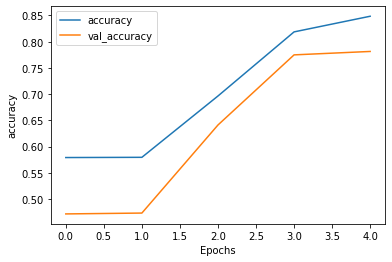

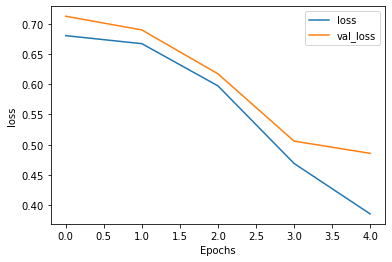

In [43]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

validation accuracy is close to 80 percent which isn't bad considering we have basic data preprocessing and only trained for 5 epochs